In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [14]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

array([[<Axes: title={'center': 'chol'}>]], dtype=object)

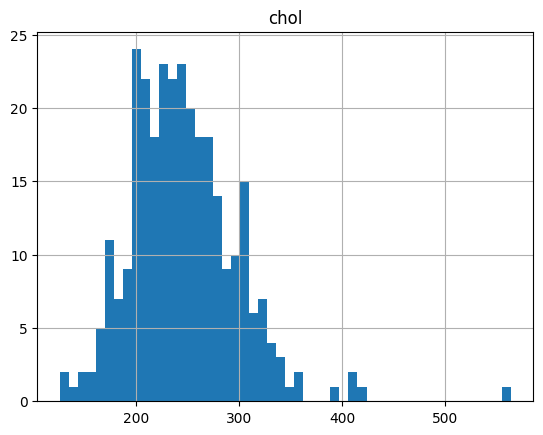

In [5]:
df.hist(column='chol', bins=50)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']].values
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [12]:
Y = df[['output']].values
Y[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [15]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print('Train set: ', X_train.shape, Y_train.shape)
print('Test set: ', X_test.shape, Y_test.shape)

Train set:  (242, 13) (242, 1)
Test set:  (61, 13) (61, 1)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
k = 6
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
neigh

D:\Projects\Toturial\Python\ML\env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [33]:
y_hat = neigh.predict(X_test)
print(y_hat[0:5])
print(Y_test[0:5])

[0 0 1 1 0]
[[1]
 [0]
 [1]
 [1]
 [0]]


In [34]:
from sklearn import metrics
print ("Train: %.2f" %(metrics.accuracy_score(Y_train, neigh.predict(X_train)) * 100))
print ("Test: %.2f" %(metrics.accuracy_score(Y_test, y_hat) * 100))

Train: 85.95
Test: 81.97


In [47]:
ks = 20
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

Y_train = Y_train.reshape(-1, 1)

for n in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, y_hat)

    std_acc[n-1] = np.std(y_hat==Y_test) / np.sqrt(y_hat.shape[0])

mean_acc.max()

D:\Projects\Toturial\Python\ML\env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Projects\Toturial\Python\ML\env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Projects\Toturial\Python\ML\env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Projects\Toturial\Python\ML\env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected

0.8524590163934426

<function matplotlib.pyplot.show(close=None, block=None)>

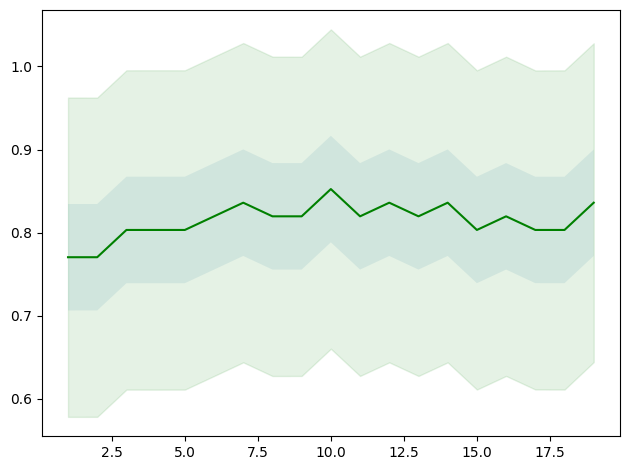

In [48]:
plt.plot(range(1,ks), mean_acc, 'g')
plt.fill_between(range(1,ks), mean_acc -1 * std_acc, mean_acc + 1 *std_acc, alpha=0.10)
plt.fill_between(range(1,ks), mean_acc -3 * std_acc, mean_acc + 3 *std_acc, alpha=0.10, color='green')
plt.tight_layout()
plt.show